In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'data/Bangalore.csv')
df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,Chandapura,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,Kasavanahalli,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [3]:
df=df[['Price','Location','Area','No. of Bedrooms']]
df

,Price,Location,Area,No. of Bedrooms
0,30000000,JP Nagar Phase 1,3340,4
1,7888000,Dasarahalli on Tumkur Road,1045,2
2,4866000,Kannur on Thanisandra Main Road,1179,2
3,8358000,Doddanekundi,1675,3
4,6845000,Kengeri,1670,3
...,...,...,...,...
6202,5364000,Chandapura,590,1
6203,8716000,Kasavanahalli,1179,2
6204,7373000,Kasavanahalli,1143,2
6205,4985000,Kasavanahalli,1680,3


In [4]:
#encode the location column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Location']=le.fit_transform(df['Location'])

C:\Users\arbag\AppData\Local\Temp\ipykernel_2964\790809012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location']=le.fit_transform(df['Location'])


In [5]:
X=df.drop('Price',axis=1)
y=df['Price']

In [6]:
## train the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=30,random_state=42)

In [7]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
from sklearn.model_selection import cross_val_score


In [11]:
mse=-cross_val_score(lr,X_train,y_train,scoring='r2',cv=5)
mse

array([-0.13572349, -0.04823827, -0.31676458, -0.23440042, -0.12273912])

In [12]:
mse.mean()

-0.17157317543814748

In [13]:
reg_pred=lr.predict(X_test)

In [14]:
reg_pred

array([18689678.59559395,  8601633.6065527 ,  8118347.62706219,
       12883799.10214714, 14245730.89267924,  7013019.36944557,
        7389762.21240606,  8322294.89594638,  6704491.44849282,
       24361939.43994581,  7949663.25109183, 10557763.67216171,
       11145578.84703685, 10006822.34875599,  8165105.54137649,
        8789969.96146286, 13338757.87602383,  9743695.44935842,
        6479066.88664736,  7873334.22842278, 28195498.88976286,
       12514030.10889708,  4963314.22821609,  6414327.19894074,
        6508285.72048972,  9008010.70001379,  4761235.13023141,
       18142937.34078199, 28881153.89891823,  7884607.90336306])

<Axes: xlabel='Price', ylabel='Density'>

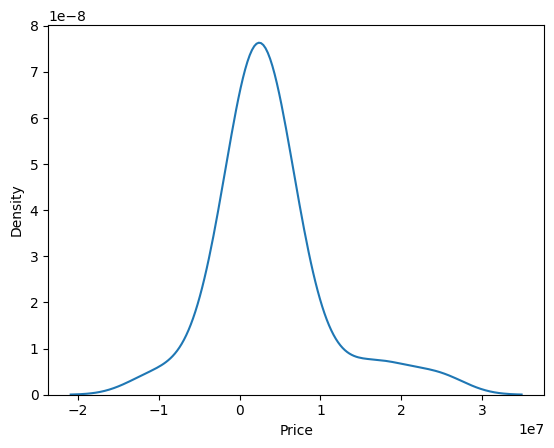

In [15]:
import seaborn as sns
sns.kdeplot(reg_pred-y_test)

In [16]:
from sklearn.metrics import r2_score
score =r2_score(reg_pred,y_test)
score

-0.46359099109290125

*Ridge Regression (Remove Underfitting Condition)**

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [18]:
ridge_regressor=Ridge()

In [19]:
ridge_regressor

Ridge()

In [20]:
parameters={'alpha':[1,2,3,4,10,20, 30,40,55,65,89,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='r2',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 10, 20, 30, 40, 55, 65, 89, 90]},
             scoring='r2')

In [21]:
print(ridgecv.best_score_)

0.17174550904620606


In [22]:
ridge_pred=ridgecv.predict(X_test)


<Axes: xlabel='Price', ylabel='Density'>

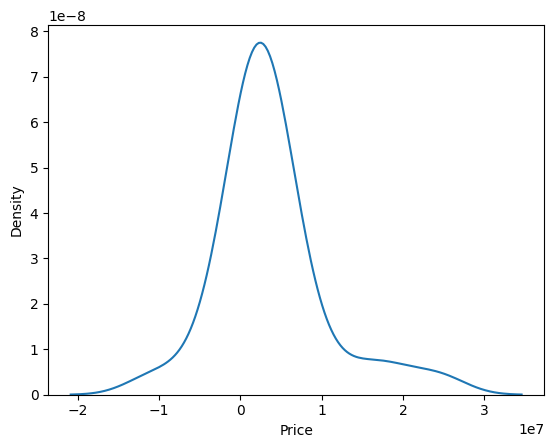

In [23]:
sns.kdeplot(ridge_pred-y_test)

**Lasso Regression (Remove Permanent Overfitting, use for feature selection)**

In [24]:
from sklearn.linear_model import Lasso

In [25]:
lasso=Lasso()

In [26]:
lasso

Lasso()

In [27]:
parameters={'alpha':[1,2,3,4,10,20, 30,40,55,65,89,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='r2',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 10, 20, 30, 40, 55, 65, 89, 90]},
             scoring='r2')

In [28]:
print(lassocv.best_score_)

0.17157357444811666


In [29]:
lasso_pred=lassocv.predict(X_test)


<Axes: xlabel='Price', ylabel='Density'>

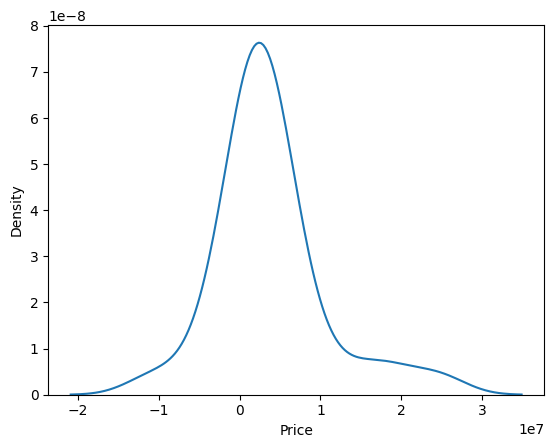

In [30]:
sns.kdeplot(lasso_pred-y_test)